## Purpose
This notebook analyzes the gender distribution of individuals on the Midas list. It starts by extracting raw data, processing it into a Pandas DataFrame, and then uses the gender-guesser library to impute a proxy gender for each individual based on their first name. Finally, it calculates, displays, and visualizes this gender distribution through a bar plot and summarizes the key findings and insights.

The gender distribution within the `midas_df` DataFrame is predominantly male. Out of 100 entries, 74 individuals were identified as male, 10 as female, 11 as unknown, and 5 as 'andy' (a category indicating names with significant overlap between male and female usage).

### Data Analysis Key Findings
*   A new column named `first_name` extracted from the `name` column and added to the DataFrame.
*   A new `gender` column added to the DataFrame, imputing proxy gender based on first names using the `gender-guesser` library.
*   The gender distribution of individuals in the Midas list is as follows:
    *   **Male:** 74 individuals
    *   **Unknown:** 11 individuals
    *   **Female:** 10 individuals
    *   **Andy:** 5 individuals
*   There is a significant dominance of male representation on the Midas list, accounting for 74% of the entries.
*   Female representation is notably low, comprising only 10% of the individuals.
*   11% of individuals had an 'unknown' gender, meaning their first names could not be confidently classified.

### Insights or Next Steps
*   The analysis highlights a significant gender imbalance within the Midas list, with a strong male dominance. This could indicate systemic biases in the industry or selection criteria for the list.
*   I acknowledge that the gender imputation method is an approximation and might reflect societal naming biases. Further investigation could involve more sophisticated gender prediction models or direct data collection.


In [8]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# The raw string data for 2025 scraped from https://www.forbes.com/lists/midas/
raw_data = """
1
Alfred Lin
Sequoia
San Francisco, California, United States
OpenAI
2
Reid Hoffman
Greylock Partners
Palo Alto, California, United States
Airbnb
3
Peter Thiel
Founders Fund
Los Angeles, California, United States
Palantir
4
Neil Shen
HongShan
Hong Kong, China
ByteDance
5
Micky Malka
Ribbit Capital
Menlo Park, California, United States
Coinbase
6
Vinod Khosla
Khosla Ventures
Portola Valley, California, United States
Commonwealth Fusion Systems
7
Douglas Leone
Sequoia
Atherton, California, United States
Wiz
8
Hemant Taneja
General Catalyst
Palo Alto, California, United States
Applied Intuition
9
Fred Wilson
Union Square Ventures
New York, New York, United States
Coinbase
10
Chris Dixon
Andreessen Horowitz
Menlo Park, California, United States
Coinbase
11
Mike Speiser
Sutter Hill Ventures
San Francisco, California, United States
Snowflake
12
Richard Liu
5Y Capital
Hong Kong, China
XPeng
13
Roelof Botha
Sequoia
Menlo Park, California, United States
Natera
14
Satish Dharmaraj
Redpoint Ventures
Saratoga, California, United States
Snowflake
15
Saurabh Gupta
DST Global
San Francisco, California, United States
Chime
16
Avi Eyal
Entrée Capital
Tel Aviv, Israel
monday.com
17
Keith Rabois
Khosla Ventures
New York, New York, United States
Ramp
18
Marc Andreessen
Andreessen Horowitz
Menlo Park, California, United States
Samsara
19
Trae Stephens
Founders Fund
San Francisco, California, United States
Anduril
20
Navin Chaddha
Mayfield
Menlo Park, California, United States
Poshmark
21
Martin Mignot
Index Ventures
New York, United States
Revolut
22
Mamoon Hamid
Kleiner Perkins
Atherton, California, United States
Slack
23
Eric Vishria
Benchmark
Atherton, California, United States
Cerebras
24
Gili Raanan
Cyberstarts
Michmoret, Israel
Wiz
25
Randy Glein
DFJ Growth
San Mateo, California, United States
SpaceX
26
Saar Gur
CRV
San Francisco, California, United States
DoorDash
27
David Frankel
Founder Collective
Brookline, Massachusetts, United States
Shield AI
28
Pawel Chudzinski
Point Nine Capital
Berlin, Germany
Revolut
29
Yi Cao
Source Code Capital
China
ByteDance
30
Topher Conway
SV Angel
San Francisco, California, United States
Rippling
31
Tuck Lye Koh
Shunwei Capital
Beijing, China
Xiaomi
32
Scott Raney
Redpoint Ventures
Menlo Park, California, United States
Stripe
33
Ben Horowitz
Andreessen Horowitz
Menlo Park, California, United States
Databricks
34
Hurst Lin
DCM
Beijing, China
Kuaishou
35
Marc Stad
Dragoneer Investment Group
San Francisco, California, United States
Uber
36
Pat Grady
Sequoia
Portola Valley, California, United States
Snowflake
37
Barry Schuler
DFJ Growth
Napa, California, United States
Coinbase
38
Neil Mehta
Greenoaks
San Francisco, California, United States
Coupang
39
Xi Cao
Monolith
Beijing, China
Kuaishou
40
Brad Gerstner
Altimeter Capital
Woodside, California, United States
Snowflake
41
Shardul Shah
Index Ventures
New York, New York, United States
Wiz
42
Ben Sun
Primary Venture Partners
New York, New York, United States
Coupang
43
Tom Stafford
DST Global
London, United Kingdom
Nubank
44
Mar Hershenson
Pear VC
Los Altos, California, United States
DoorDash
45
Nicolas Szekasy
Kaszek
Montevideo, Uruguay
Nubank
46
Pejman Nozad
Pear VC
Atherton, California, United States
DoorDash
7
Fisher Zhang
5Y Capital
Hong Kong, China
Kuaishou
48
Mike Volpi
Index Ventures
Woodside, California, United States
Confluent
49
Mary Meeker
BOND
United States
Canva
50
Jan Hammer
Index Ventures
London, United Kingdom
Robinhood
51
Luciana Lixandru
Sequoia
London, United Kingdom
UiPath
52
Meng Lian
IDG Capital
Guangzhou, China
Shein
53
Koichiro Nakamura
Sozo Ventures
Los Gatos, California, United States
Palantir
54
David George
Andreessen Horowitz
Menlo Park, California, United States
Roblox
55
Ravi Mhatre
Lightspeed Venture Partners
Menlo Park, California, United States
Rubrick
56
Peter Fenton
Benchmark
San Francisco, California, United States
Airtable
57
Allen Zhu
GSR Ventures
Shanghai, China
DiDi Chuxing
58
Larry Li
Amino Capital
Palo Alto, California, United States
Chime
59
Philippe Botteri
Accel
London, United Kingdom
Docusign
60
Byron Deeter
Bessemer Venture Partners
Atherton, California, United States
Twilio
61
Ronny Conway
A.Capital
San Francisco, California, United States
Notion
62
Anna Fang
ZhenFund
Beijing, China
Xiaohongshu
63
Lucas Swisher
Coatue Management
San Francisco, California, United States
UiPath
64
David B. Singer
Maverick Ventures
San Francisco, California, United States
One Medical
65
Jixun Foo
Granite Asia
Shanghai, China
Grab
66
Ilya Fushman
Kleiner Perkins
Atherton, California, United States
Loom
67
Max Gazor
CRV
San Francisco, California, United States
Airtable
68
Chetan Puttagunta
Benchmark
San Francisco, California, United States
Elastic
69
Daniel Levine
Accel
San Francisco, California, United States
Scale AI
70
Kirsten Green
Forerunner Ventures
United States
Chime
71
Xiaojun Li
IDG Capital
Boston, Massachusetts, United States
Xiaomi
72
Ashvin Bachireddy
SV Angel
Menlo Park, California, United States
Databricks
73
Rahul Mehta
DST Global
Dubai, United Arab Emirates
DoorDash
74
Lauren Kolodny
Acrew Capital
San Francisco, California, United States
Chime
75
Jenny Lee
Granite Asia
Singapore
Kingsoft WPS
76
Lee Fixel
Addition
New York, New York, United States
Flipkart
77
Matt Witheiler
Wellington Management
Denver, Colorado, United States
Scale
78
John Lindfors
DST Global
Hong Kong, China
Kuaishou
79
Aydin Senkut
Felicis Ventures
Atherton, California, United States
Credit Karma
80
Shaun Maguire
Sequoia
Menlo Park, California, United States
SpaceX
81
Salil Deshpande
Uncorrelated
Palo Alto, California, United States
Redis
82
Nisa Leung
Qiming Venture Partners
Hong Kong, China
Alamar Biosciences
83
Pete Sonsini
Laude Ventures
Atherton, California, United States
Databricks
84
Brian Singerman
Founders Fund
San Francisco, California, United States
Anduril
85
David Sacks
Craft Ventures
San Francisco, California, United States
SpaceX
86
Wesley Chan
FPV
Jackson Hole, Wyoming, United States
Canva
87
Elad Gil
Gil Capital
San Francisco, California, United States
Stripe
88
Ross Fubini
XYZ Venture Capital
San Francisco, California, United States
Anduril
89
Josh Kopelman
First Round
Philadelphia, Pennsylvania, United States
Clover Health
90
Nigel Morris
QED Investors
Alexandria, Virginia, United States
Nubank
91
Rich Wong
Accel
Hillsborough, California, United States
UiPath
92
Robert Nelsen
ARCH Venture Partners
San Francisco, California, United States
Karuna Therapeutics
93
Annie Lamont
Oak HC/FT
Greenwich, Connecticut, United States
Carebridge
94
Danny Rimer
Index Ventures
London, United Kingdom
Figma
95
Scott Sandell
New Enterprise Associates
Palm Beach, Florida, United States
Cloudflare
96
Adam Ross
Goldcrest Capital
Dallas, Texas, United States
Anduril
97
David Su
Matrix Partners China
Shanghai, China
XPeng
98
Hans Tung
Notable Capital
San Francisco, California, United States
Ibotta
99
Reshma Sohoni
Seedcamp
Miami, Florida, United States
Synthesia
100
Eric Liaw
Institutional Venture Partners
London, United Kingdom
UiPath
"""

# Regular Expression to find blocks of 5 lines
# Pattern: (Rank)\n(Name)\n(Firm)\n(Location)\n(Notable Deal)
pattern = r"(\d+)\n(.+)\n(.+)\n(.+)\n(.+)"

# Find all matches
matches = re.findall(pattern, raw_data)

# Create the DataFrame
midas_df = pd.DataFrame(matches, columns=['rank', 'name', 'firm', 'location', 'notable_deal'])

# Convert rank to integer for proper sorting
midas_df['rank'] = midas_df['rank'].astype(int)

print(midas_df.head())

   rank          name               firm  \
0     1    Alfred Lin            Sequoia   
1     2  Reid Hoffman  Greylock Partners   
2     3   Peter Thiel      Founders Fund   
3     4     Neil Shen           HongShan   
4     5   Micky Malka     Ribbit Capital   

                                   location notable_deal  
0  San Francisco, California, United States       OpenAI  
1      Palo Alto, California, United States       Airbnb  
2    Los Angeles, California, United States     Palantir  
3                          Hong Kong, China    ByteDance  
4     Menlo Park, California, United States     Coinbase  


Extract the first name by splitting the `name` column by space then pull the first element for each entry, storing the result in a new column called `first_name`.



In [9]:
midas_df['first_name'] = midas_df['name'].apply(lambda x: x.split(' ')[0])
print(midas_df.head())

   rank          name               firm  \
0     1    Alfred Lin            Sequoia   
1     2  Reid Hoffman  Greylock Partners   
2     3   Peter Thiel      Founders Fund   
3     4     Neil Shen           HongShan   
4     5   Micky Malka     Ribbit Capital   

                                   location notable_deal first_name  
0  San Francisco, California, United States       OpenAI     Alfred  
1      Palo Alto, California, United States       Airbnb       Reid  
2    Los Angeles, California, United States     Palantir      Peter  
3                          Hong Kong, China    ByteDance       Neil  
4     Menlo Park, California, United States     Coinbase      Micky  


Imperfectly impute gender, by installing the `gender-guesser` library.



In [10]:
pip install gender-guesser

Now that the `gender-guesser` library is installed, import the `Detector` class, create an instance, and apply it to the `first_name` column of `midas_df` to impute gender, handling unknown cases, and then display the updated DataFrame.



In [11]:
import gender_guesser.detector as gender

d = gender.Detector(case_sensitive=False)

# Function to get gender, handling cases where gender cannot be determined
def get_gender(name):
    g = d.get_gender(name)
    if g in ['unknown', 'mostly_male', 'mostly_female']:
        # Simplifies mostly_male/female to male/female, unknown remains unknown
        return g.replace('mostly_', '')
    return g

midas_df['gender'] = midas_df['first_name'].apply(get_gender)
print(midas_df.head())

   rank          name               firm  \
0     1    Alfred Lin            Sequoia   
1     2  Reid Hoffman  Greylock Partners   
2     3   Peter Thiel      Founders Fund   
3     4     Neil Shen           HongShan   
4     5   Micky Malka     Ribbit Capital   

                                   location notable_deal first_name gender  
0  San Francisco, California, United States       OpenAI     Alfred   male  
1      Palo Alto, California, United States       Airbnb       Reid   male  
2    Los Angeles, California, United States     Palantir      Peter   male  
3                          Hong Kong, China    ByteDance       Neil   male  
4     Menlo Park, California, United States     Coinbase      Micky   male  


Calculate and display gender distribution of the Midas list using the `value_counts()` method on the `gender` column of the `midas_df` DataFrame and then print the result.



In [12]:
gender_distribution = midas_df['gender'].value_counts()
print("Gender Distribution:")
print(gender_distribution)

Gender Distribution:
gender
male       74
unknown    11
female     10
andy        5
Name: count, dtype: int64


Visualize the gender distribution and create a bar plot using `matplotlib.pyplot`, and then use the `gender_distribution` Series to generate the plot, adding appropriate labels and a title for clarity.



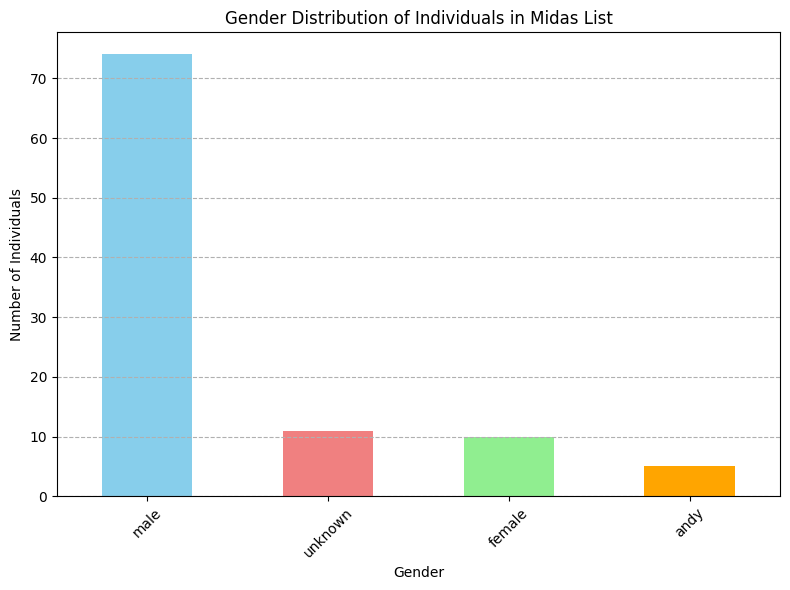

In [13]:
plt.figure(figsize=(8, 6))
gender_distribution.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Gender Distribution of Individuals in Midas List')
plt.xlabel('Gender')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()
